# Importación de librerías y datos

Librerías a utilizar

In [ ]:
import pylab as py
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IDM/7mo semestre idm/Elisabetta/Act Procesamiento de Datos/Automobile.csv', na_values = "?")

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Limpieza de datos

In [ ]:
df.shape

(205, 26)

205 datos y 26 columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   number-of-doors    203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
pd.set_option('display.max_rows', 500)
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
number-of-doors        2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

In [ ]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
number-of-doors       2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
(df.isna().sum()/df.shape[0])*100

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
number-of-doors       0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

## Symboling

In [ ]:
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

No hay datos faltantes ni anómalos

## Normalized - losses

In [ ]:
df["normalized-losses"].value_counts()

161.0    11
91.0      8
150.0     7
128.0     6
134.0     6
104.0     6
95.0      5
102.0     5
103.0     5
74.0      5
85.0      5
168.0     5
94.0      5
65.0      5
106.0     4
122.0     4
148.0     4
118.0     4
93.0      4
101.0     3
125.0     3
137.0     3
154.0     3
83.0      3
115.0     3
119.0     2
87.0      2
194.0     2
197.0     2
108.0     2
89.0      2
164.0     2
158.0     2
145.0     2
192.0     2
188.0     2
81.0      2
110.0     2
113.0     2
129.0     2
153.0     2
107.0     1
78.0      1
186.0     1
231.0     1
77.0      1
98.0      1
121.0     1
90.0      1
142.0     1
256.0     1
Name: normalized-losses, dtype: int64

No hay datos anómalos pero sí hay datos faltantes.

Tratamiento de datos faltantes:

(array([17., 46., 31., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

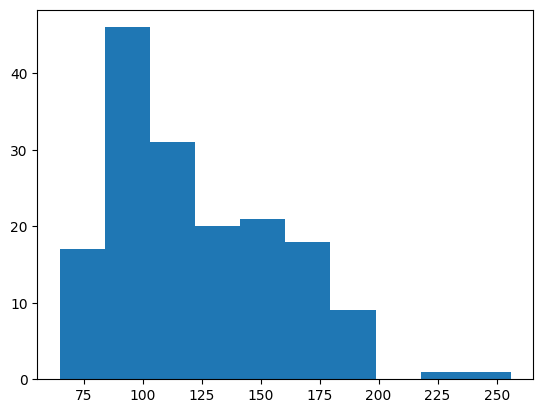

In [ ]:
plt.hist(df["normalized-losses"])

In [ ]:
df["normalized-losses"] = df["normalized-losses"].fillna(df["normalized-losses"].median())

## Make

In [ ]:
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

No hay datos faltantes ni anómalos

## Fuel type

In [ ]:
df["fuel-type"].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

No hay datos faltantes ni anómalos

## Aspiration

In [ ]:
df["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

No hay datos faltantes ni anómalos

## Number of doors

In [ ]:
df["number-of-doors"].value_counts()

four    114
two      89
Name: number-of-doors, dtype: int64

In [ ]:
df = df.rename(columns = {"number-of-doors": "number_of_doors", "fuel-type": "fuel_type"})

In [ ]:
df[(df.number_of_doors != "four")&(df.number_of_doors != "two")]

,symboling,normalized-losses,make,fuel_type,aspiration,number_of_doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,115.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [ ]:
dodge = df[(df.make == "dodge") & (df.fuel_type == "gas") & (df.aspiration == "turbo")]
mazda = df[(df.make == "mazda") & (df.fuel_type == "diesel") & (df.aspiration == "std")]

In [ ]:
dodge["number_of_doors"].value_counts()

two    2
Name: number_of_doors, dtype: int64

In [ ]:
df["number_of_doors"][27] = "two"

<ipython-input-282-a0af0c1def8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_doors"][27] = "two"


In [ ]:
mazda["number_of_doors"].value_counts()

four    1
Name: number_of_doors, dtype: int64

In [ ]:
df["number_of_doors"][63] = "four"

<ipython-input-284-4f87397fc975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_doors"][63] = "four"


In [ ]:
df["number_of_doors"] = df["number_of_doors"].replace(to_replace="four",value=4)
df["number_of_doors"] = df["number_of_doors"].replace(to_replace="two",value=2)

No hay datos faltantes ni anómalos

## Body style

In [ ]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

No hay datos faltantes ni anómalos

## Drive wheels

In [ ]:
df["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

No hay datos faltantes ni anómalos.
Ya que no hay descripción de los datos, se asume que 4wd es otra posible categoría

## Engine location

In [ ]:
df["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

No hay datos faltantes ni anómalos

## Wheel base

In [ ]:
df["wheel-base"].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheel-base, dtype: int64

No hay datos faltantes ni anómalos

## Length

In [ ]:
df["length"].value_counts()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
165.3     6
177.8     6
176.2     6
186.6     6
172.0     5
176.8     5
175.6     5
173.2     5
169.0     4
198.9     4
168.9     4
172.4     4
168.7     4
170.7     3
192.7     3
159.1     3
155.9     3
150.0     3
169.7     3
175.4     3
158.7     3
167.3     2
173.0     2
183.5     2
187.8     2
173.5     2
184.6     2
173.4     2
170.2     2
180.2     2
173.6     2
168.8     2
189.0     2
190.9     2
144.6     2
174.6     2
199.6     2
166.8     2
175.0     2
167.5     2
202.6     2
176.6     2
177.3     1
178.2     1
159.3     1
157.1     1
165.7     1
193.8     1
197.0     1
141.1     1
158.8     1
183.1     1
163.4     1
171.2     1
156.9     1
157.9     1
178.4     1
169.1     1
181.5     1
175.7     1
172.6     1
191.7     1
178.5     1
181.7     1
162.4     1
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: length, dtype: int64

No hay datos faltantes ni anómalos

## Width

In [ ]:
df["width"].value_counts()

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: width, dtype: int64

No hay datos faltantes ni anómalos

## Height

In [ ]:
df["height"].value_counts()

50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: height, dtype: int64

No hay datos faltantes ni anómalos

## Curb weight

In [ ]:
df["curb-weight"].value_counts()

2385    4
1918    3
2275    3
1989    3
2410    2
2191    2
2535    2
2024    2
2414    2
4066    2
2380    2
3139    2
2756    2
1967    2
3075    2
2145    2
2290    2
2403    2
2579    2
2300    2
2548    2
2128    2
3230    2
2337    2
2395    2
1876    2
3252    2
1909    2
1874    2
2319    1
3157    1
2240    1
2952    1
2190    1
2340    1
2510    1
2420    1
2455    1
2050    1
2650    1
3045    1
1985    1
2040    1
2120    1
2847    1
2280    1
2808    1
2758    1
2707    1
2695    1
2658    1
2460    1
3049    1
3366    1
2800    1
3012    1
3217    1
2778    1
2818    1
3130    1
2015    1
3110    1
2212    1
2976    1
2975    1
2326    1
2912    1
2480    1
2563    1
2458    1
3016    1
2081    1
3131    1
3151    1
2661    1
2261    1
2209    1
2264    1
2714    1
2679    1
2551    1
2536    1
2254    1
3485    1
2540    1
3034    1
2935    1
2265    1
2204    1
2169    1
2140    1
2122    1
2094    1
2221    1
2109    1
3042    1
2302    1
3285    1
1956    1
2236    1


No hay datos faltantes ni anómalos

## Engine type

In [ ]:
df["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

No hay datos faltantes ni anómalos
Ya que no hay descripción de los datos, se asume que l es otra categoría de engine-type

## Num of cylinders

In [ ]:
df["num-of-cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

No hay datos faltantes ni anómalos

In [ ]:
df["num-of-cylinders"] = df["num-of-cylinders"].replace(to_replace="four",value=4)
df["num-of-cylinders"] = df["num-of-cylinders"].replace(to_replace="six",value=6)
df["num-of-cylinders"] = df["num-of-cylinders"].replace(to_replace="five",value=5)
df["num-of-cylinders"] = df["num-of-cylinders"].replace(to_replace="eight",value=8)
df["num-of-cylinders"] = df["num-of-cylinders"].replace(to_replace="two",value=2)
df["num-of-cylinders"] = df["num-of-cylinders"].replace(to_replace="three",value=3)
df["num-of-cylinders"] = df["num-of-cylinders"].replace(to_replace="twelve",value=12)

## Engine size

In [ ]:
df["engine-size"].value_counts()

122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: engine-size, dtype: int64

No hay datos faltantes ni anómalos

## Fuel system

In [ ]:
df["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

No hay datos faltantes ni anómalos

## Bore

In [ ]:
df["bore"].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.31     8
3.43     8
3.27     7
2.91     7
3.54     6
3.05     6
3.58     6
3.39     6
3.01     5
3.70     5
3.35     4
3.17     3
3.59     3
3.74     3
3.33     2
3.24     2
3.94     2
3.47     2
3.80     2
3.63     2
3.50     2
3.13     2
2.68     1
2.99     1
3.08     1
3.61     1
2.92     1
3.60     1
2.54     1
3.34     1
3.76     1
Name: bore, dtype: int64

(array([ 1.,  1.,  8., 37., 40., 24., 27., 42., 17.,  4.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

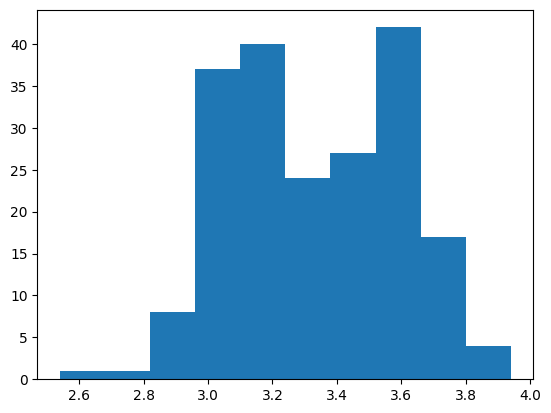

In [ ]:
plt.hist(df["bore"])

In [ ]:
df[df["bore"].isna()]

,symboling,normalized-losses,make,fuel_type,aspiration,number_of_doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [ ]:
df["bore"] = df["bore"].fillna(df["bore"].median())

## Stroke

In [ ]:
df["stroke"].value_counts()

3.40    20
3.03    14
3.23    14
3.15    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.07     6
3.58     6
3.50     6
3.27     6
3.41     6
3.11     6
3.19     6
3.52     5
3.64     5
3.47     4
3.86     4
3.54     4
3.90     3
2.90     3
3.08     2
2.19     2
2.68     2
3.10     2
4.17     2
2.80     2
3.12     1
3.21     1
2.07     1
2.36     1
3.16     1
2.76     1
2.87     1
Name: stroke, dtype: int64

Hay datos faltantes

(array([ 3.,  1., 13.,  7., 30., 52., 71., 15.,  7.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <BarContainer object of 10 artists>)

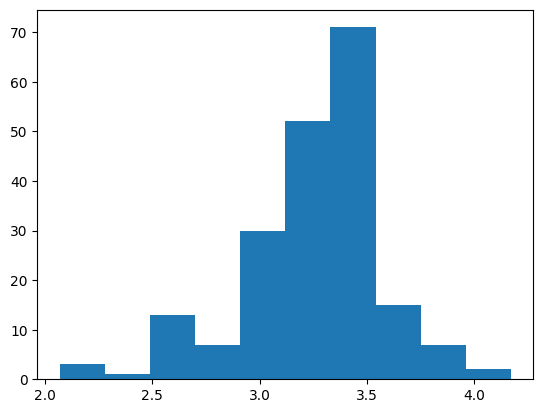

In [ ]:
plt.hist(df["stroke"])

In [ ]:
df["stroke"] = df["stroke"].fillna(df["stroke"].mean())

## Compression ratio

In [ ]:
df["compression-ratio"].value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: compression-ratio, dtype: int64

No hay datos faltantes ni anómalos

## Horsepower

In [ ]:
df["horsepower"].value_counts()

68.0     19
70.0     11
69.0     10
116.0     9
110.0     8
95.0      7
114.0     6
160.0     6
101.0     6
62.0      6
88.0      6
145.0     5
76.0      5
97.0      5
82.0      5
84.0      5
102.0     5
92.0      4
111.0     4
123.0     4
86.0      4
207.0     3
182.0     3
90.0      3
121.0     3
152.0     3
85.0      3
73.0      3
161.0     2
94.0      2
56.0      2
112.0     2
184.0     2
155.0     2
156.0     2
52.0      2
100.0     2
162.0     2
176.0     2
140.0     1
115.0     1
134.0     1
78.0      1
48.0      1
288.0     1
143.0     1
142.0     1
200.0     1
58.0      1
55.0      1
60.0      1
175.0     1
154.0     1
72.0      1
120.0     1
64.0      1
135.0     1
262.0     1
106.0     1
Name: horsepower, dtype: int64

(array([55., 49., 49., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

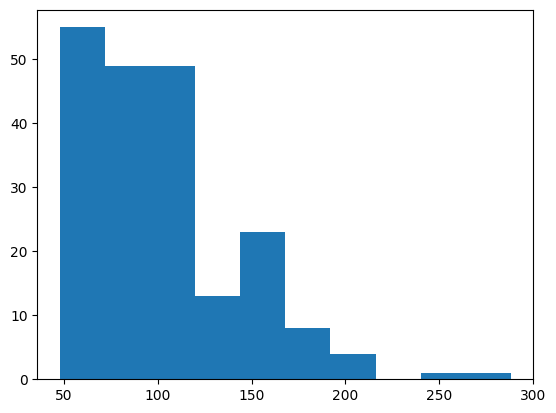

In [ ]:
plt.hist(df["horsepower"])

In [ ]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

## Peak rpm

In [ ]:
df["peak-rpm"].value_counts()

5500.0    37
4800.0    36
5000.0    27
5200.0    23
5400.0    13
6000.0     9
5800.0     7
5250.0     7
4500.0     7
4150.0     5
4200.0     5
4350.0     4
4750.0     4
5100.0     3
5900.0     3
4250.0     3
4400.0     3
6600.0     2
4650.0     1
5600.0     1
5750.0     1
4900.0     1
5300.0     1
Name: peak-rpm, dtype: int64

(array([17., 10., 41., 31., 31., 51.,  8., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <BarContainer object of 10 artists>)

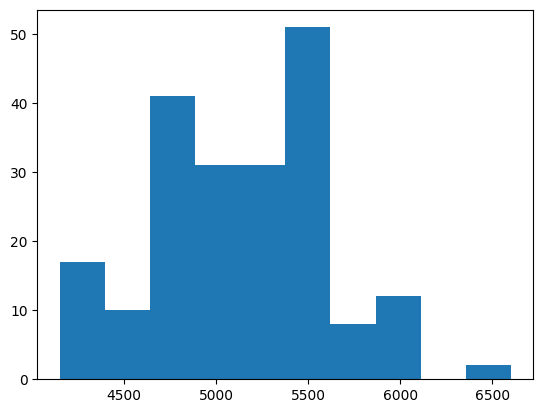

In [ ]:
plt.hist(df["peak-rpm"])

In [ ]:
df["peak-rpm"] = df["peak-rpm"].fillna(df["peak-rpm"].median())

## City mpg

In [ ]:
df["city-mpg"].value_counts()

31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: city-mpg, dtype: int64

No hay datos faltantes ni anómalos

## Highway mpg

In [ ]:
df["highway-mpg"].value_counts()

25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: highway-mpg, dtype: int64

No hay datos faltantes ni anómalos

## Price

In [ ]:
df["price"].value_counts()

8921.0     2
18150.0    2
8845.0     2
8495.0     2
7609.0     2
6692.0     2
6229.0     2
7957.0     2
7775.0     2
5572.0     2
9279.0     2
7295.0     2
16500.0    2
7898.0     2
13499.0    2
8013.0     1
7053.0     1
7603.0     1
8778.0     1
7126.0     1
6918.0     1
6488.0     1
10198.0    1
6338.0     1
5348.0     1
11694.0    1
9960.0     1
9233.0     1
5118.0     1
7463.0     1
11259.0    1
13495.0    1
18620.0    1
12764.0    1
12440.0    1
13860.0    1
15580.0    1
16900.0    1
16695.0    1
17075.0    1
16630.0    1
17950.0    1
22018.0    1
15510.0    1
32528.0    1
34028.0    1
37028.0    1
9295.0     1
9895.0     1
11850.0    1
12170.0    1
15040.0    1
6938.0     1
9258.0     1
7198.0     1
15750.0    1
7995.0     1
8195.0     1
9495.0     1
9995.0     1
11595.0    1
9980.0     1
13295.0    1
13845.0    1
12290.0    1
12940.0    1
13415.0    1
15985.0    1
16515.0    1
18420.0    1
18950.0    1
16845.0    1
19045.0    1
21485.0    1
22470.0    1
7975.0     1
15690.0    1

(array([81., 45., 35., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

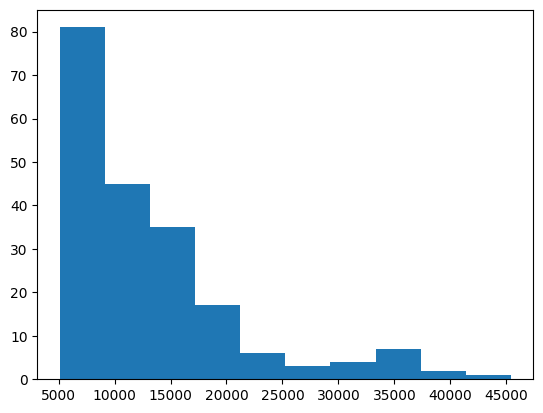

In [ ]:
plt.hist(df["price"])

In [ ]:
df["price"] = df["price"].fillna(df["price"].median())

Revisión de tipo de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   number_of_doors    205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [ ]:
df["normalized-losses"] = df["normalized-losses"].astype("int")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["horsepower"] = df["horsepower"].astype("int")
df["peak-rpm"] = df["peak-rpm"].astype("float")
df["price"] = df["price"].astype("float")

# Eliminación de valores atípicos

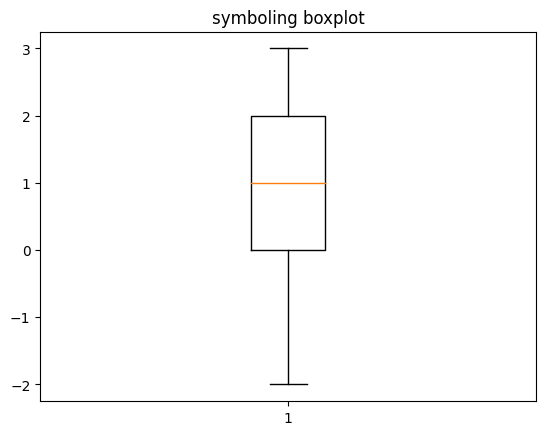

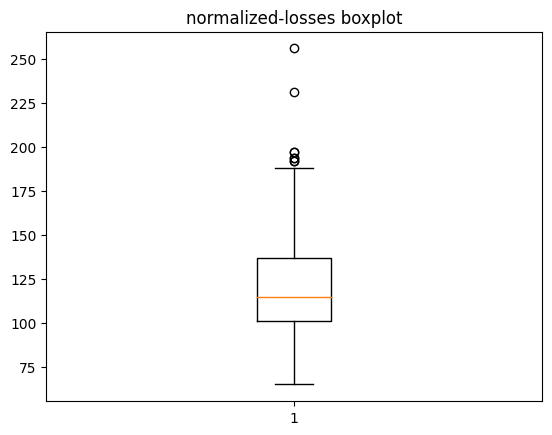

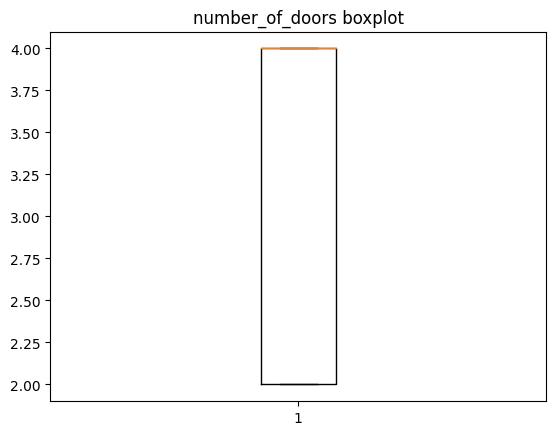

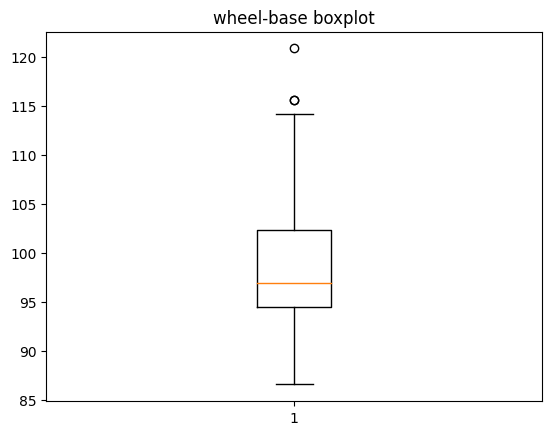

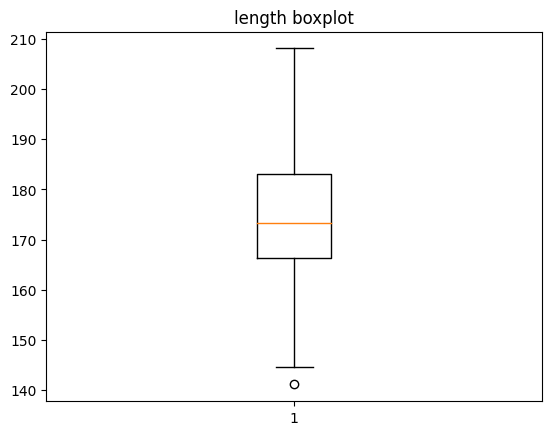

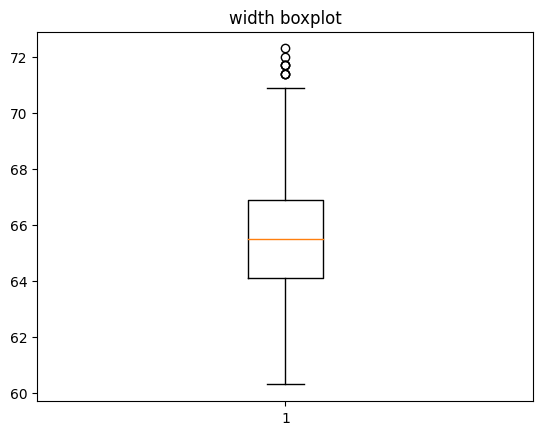

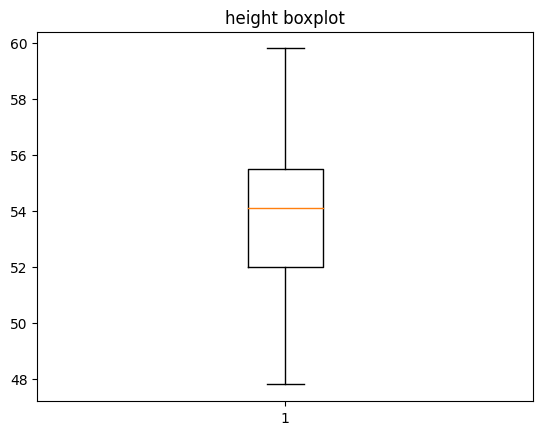

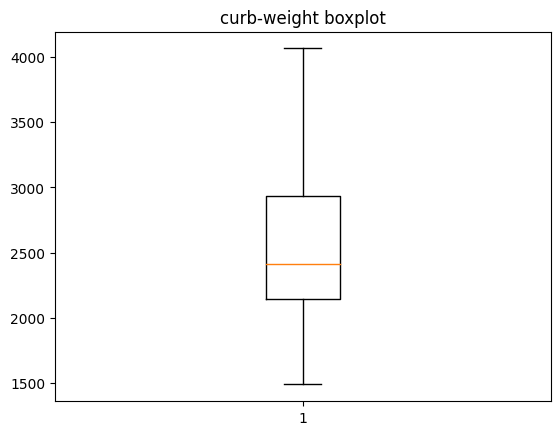

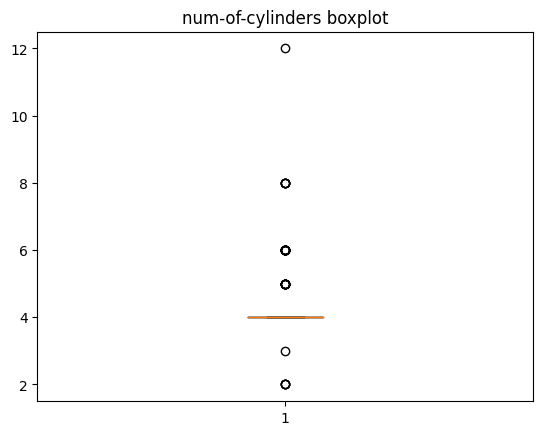

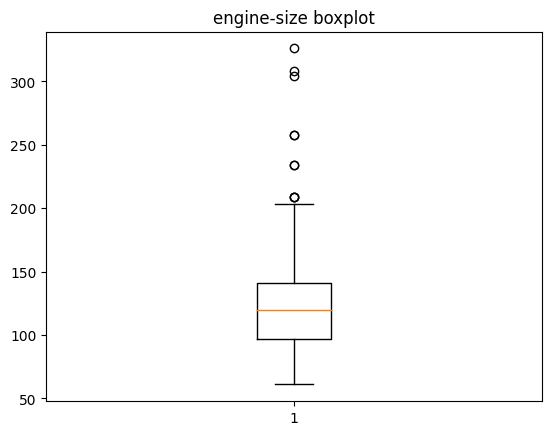

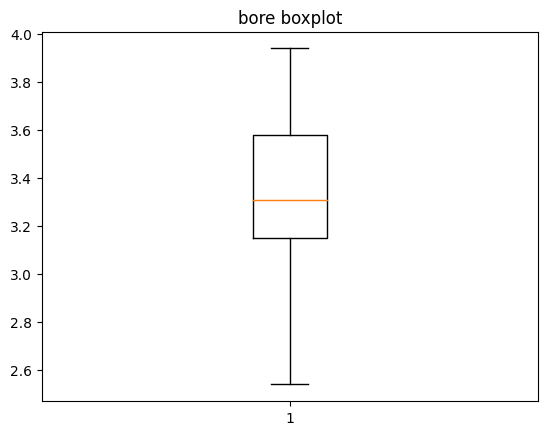

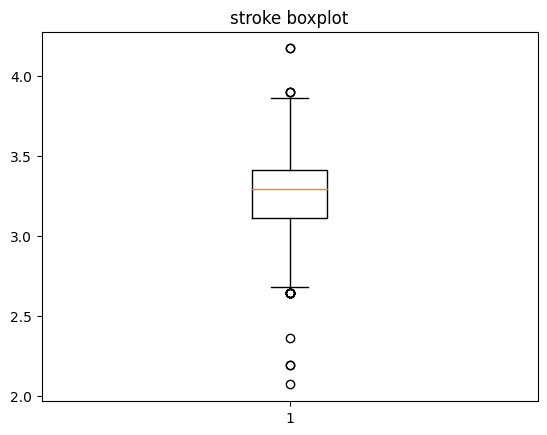

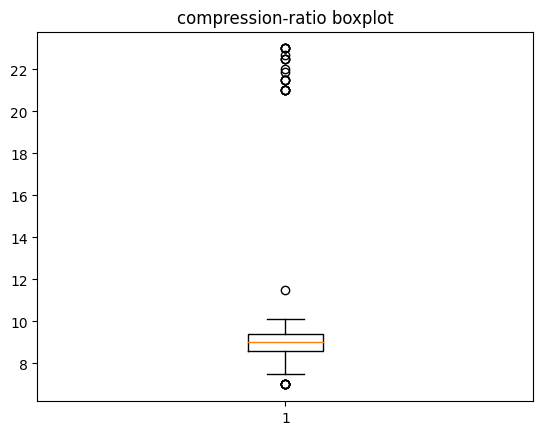

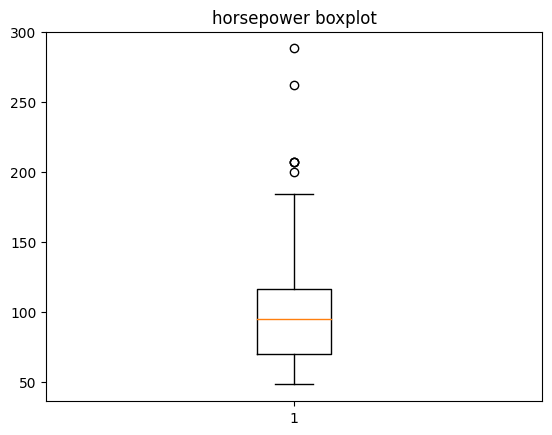

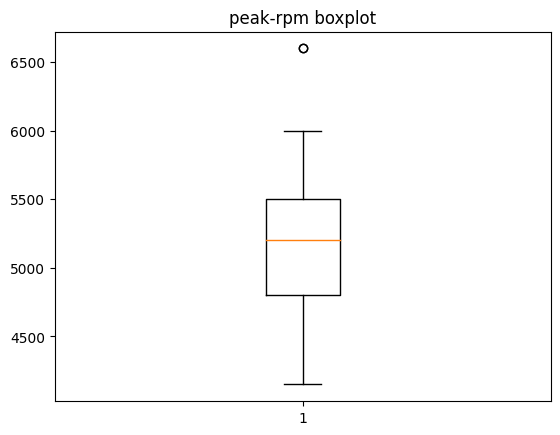

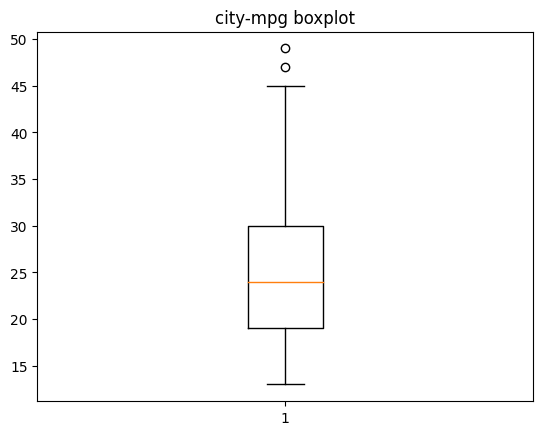

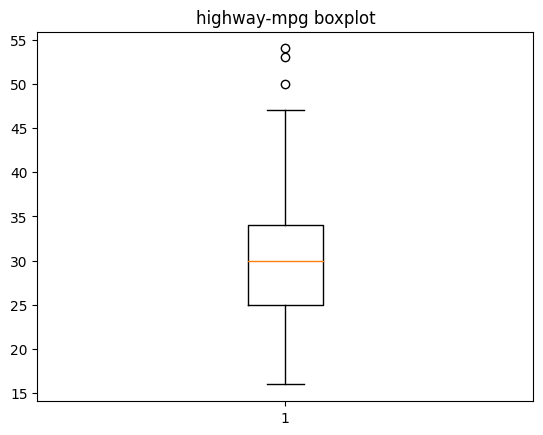

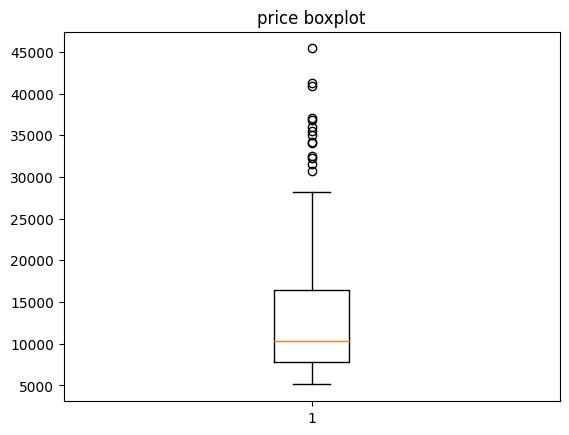

In [ ]:
numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64', 'uint8','int8']]

indices = []

for feature in numeric_cols:

  # IQR
  # Se calcula el límite superior e inferior
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  upper_array = np.where(df[feature]>=upper)[0]
  lower_array = np.where(df[feature]<=lower)[0]

  indices.append(upper_array)
  indices.append(lower_array)

  plt.boxplot(df[feature])
  plt.title(feature + " boxplot")
  plt.show()

In [ ]:
# Quitar valores duplicados de la lista, contarlos y eliminarlos

# Removing the outliers
df = df.drop(index=upper_array)
df = df.drop(index=lower_array)

# EDA

Una vez terminada la limpieza, se visualizarán las distribuciones en conjunto y sus correlaciones

<ipython-input-322-d2e830f3cdc4>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


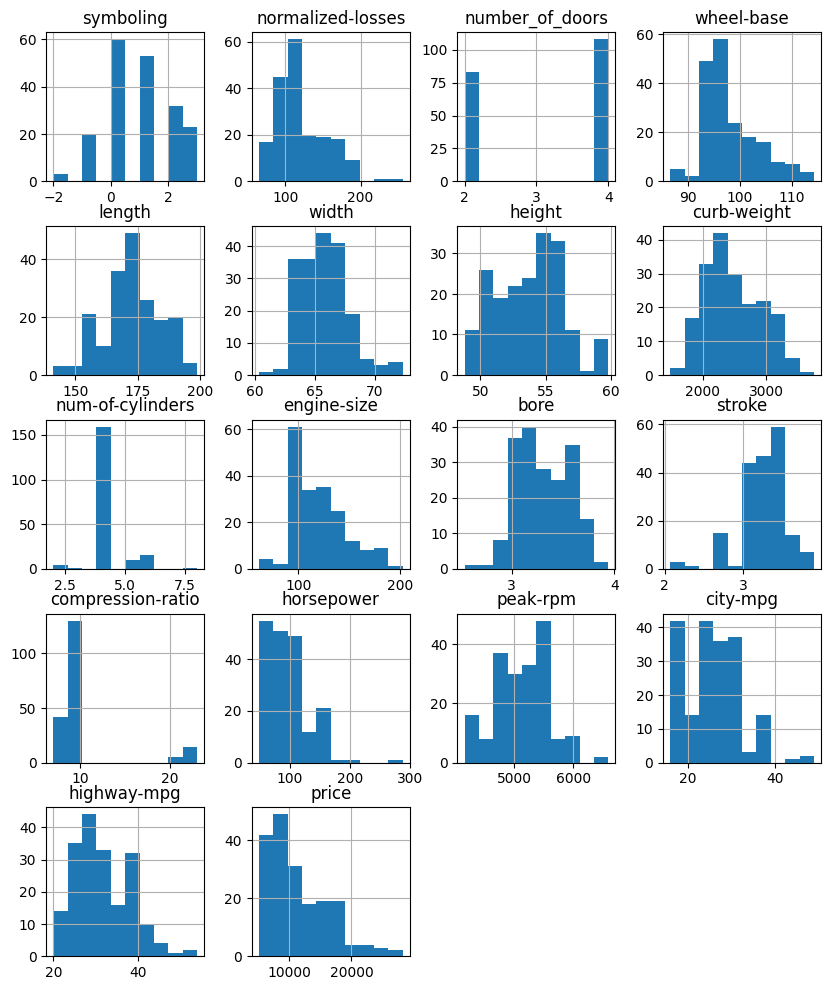

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
df.hist(ax=ax)
plt.show()

<ipython-input-323-ff579fd24513>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sns.heatmap(df.corr())


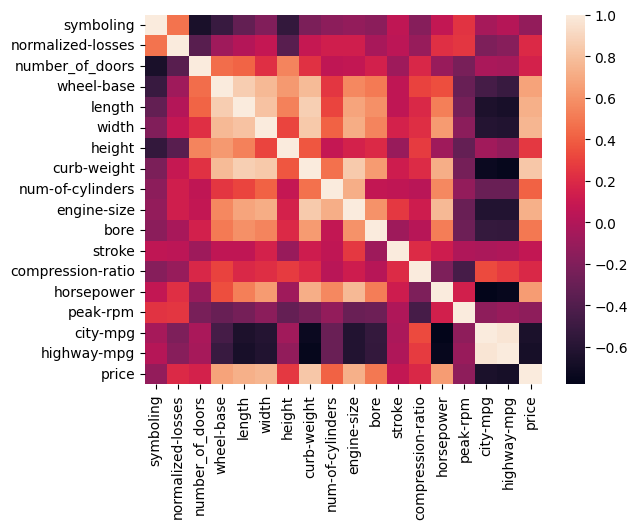

In [ ]:
# plotting correlation heatmap
dataplot=sns.heatmap(df.corr())

# displaying heatmap
mp.show()

Con este heat map nos podemos dar una idea de las variables que se correlacionan con el precio del automóvil como por ejemplo los datos relacionados a las medidas del auto.

También podemos observar que todas aquellas variables relacionadas a las dimensiones y peso del automóvil, están relacionadas entre sí.

Ahora mostraremos los valores de estas correlaciones para evitar multicolinealidad

In [ ]:
df.corr()

<ipython-input-324-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,number_of_doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.473555,-0.660092,-0.510546,-0.327271,-0.200776,-0.540809,-0.218261,-0.153848,-0.120296,-0.156046,0.055000,-0.175245,0.073354,0.239596,-0.046881,0.017641,-0.125072
normalized-losses,0.473555,1.000000,-0.369985,-0.071466,0.007163,0.081844,-0.373116,0.088324,0.133643,0.134208,-0.042529,0.043234,-0.105894,0.224048,0.254019,-0.214355,-0.172347,0.194896
number_of_doors,-0.660092,-0.369985,1.000000,0.452155,0.420799,0.222809,0.542290,0.228587,0.059585,0.071797,0.150214,-0.078442,0.180727,-0.103363,-0.231035,-0.031031,-0.049609,0.155131
wheel-base,-0.510546,-0.071466,0.452155,1.000000,0.859164,0.768832,0.630796,0.773156,0.251656,0.556308,0.505801,0.055675,0.302983,0.343418,-0.304095,-0.453358,-0.510760,0.667160
length,-0.327271,0.007163,0.420799,0.859164,1.000000,0.809871,0.529667,0.863530,0.309950,0.673289,0.594043,0.059117,0.191502,0.521753,-0.248559,-0.643589,-0.663781,0.724854
width,-0.200776,0.081844,0.222809,0.768832,0.809871,1.000000,0.305353,0.839017,0.415687,0.714808,0.547565,0.152067,0.220736,0.636875,-0.155392,-0.609502,-0.620758,0.752808
height,-0.540809,-0.373116,0.542290,0.630796,0.529667,0.305353,1.000000,0.368727,0.078221,0.152016,0.194282,-0.101421,0.274304,-0.077034,-0.317345,-0.069743,-0.128647,0.260079
curb-weight,-0.218261,0.088324,0.228587,0.773156,0.863530,0.839017,0.368727,1.000000,0.464665,0.840254,0.636288,0.117347,0.205243,0.720534,-0.246323,-0.727675,-0.757461,0.832958
num-of-cylinders,-0.153848,0.133643,0.059585,0.251656,0.309950,0.415687,0.078221,0.464665,1.000000,0.715735,0.073975,0.059273,0.028163,0.558475,-0.126226,-0.298718,-0.294951,0.414652
engine-size,-0.120296,0.134208,0.071797,0.556308,0.673289,0.714808,0.152016,0.840254,0.715735,1.000000,0.597689,0.257989,0.118939,0.765012,-0.298913,-0.614583,-0.617716,0.724202


Efectivamente, las variable "curb weight" y "engine size" tienen altos valores de correlación, 0.82 y 0.86 respectivamente.

Alta correlación entre "city-mpg" y "highway-mpg" de 0.97

# Correlación entre variables explicativas

Este procedimiento es fundamental para evitar la multicolinealidad entre variables.

Matriz de correlación

In [ ]:
df[numeric_cols].corr()

,symboling,normalized-losses,number_of_doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.473555,-0.660092,-0.510546,-0.327271,-0.200776,-0.540809,-0.218261,-0.153848,-0.120296,-0.156046,0.055000,-0.175245,0.073354,0.239596,-0.046881,0.017641,-0.125072
normalized-losses,0.473555,1.000000,-0.369985,-0.071466,0.007163,0.081844,-0.373116,0.088324,0.133643,0.134208,-0.042529,0.043234,-0.105894,0.224048,0.254019,-0.214355,-0.172347,0.194896
number_of_doors,-0.660092,-0.369985,1.000000,0.452155,0.420799,0.222809,0.542290,0.228587,0.059585,0.071797,0.150214,-0.078442,0.180727,-0.103363,-0.231035,-0.031031,-0.049609,0.155131
wheel-base,-0.510546,-0.071466,0.452155,1.000000,0.859164,0.768832,0.630796,0.773156,0.251656,0.556308,0.505801,0.055675,0.302983,0.343418,-0.304095,-0.453358,-0.510760,0.667160
length,-0.327271,0.007163,0.420799,0.859164,1.000000,0.809871,0.529667,0.863530,0.309950,0.673289,0.594043,0.059117,0.191502,0.521753,-0.248559,-0.643589,-0.663781,0.724854
width,-0.200776,0.081844,0.222809,0.768832,0.809871,1.000000,0.305353,0.839017,0.415687,0.714808,0.547565,0.152067,0.220736,0.636875,-0.155392,-0.609502,-0.620758,0.752808
height,-0.540809,-0.373116,0.542290,0.630796,0.529667,0.305353,1.000000,0.368727,0.078221,0.152016,0.194282,-0.101421,0.274304,-0.077034,-0.317345,-0.069743,-0.128647,0.260079
curb-weight,-0.218261,0.088324,0.228587,0.773156,0.863530,0.839017,0.368727,1.000000,0.464665,0.840254,0.636288,0.117347,0.205243,0.720534,-0.246323,-0.727675,-0.757461,0.832958
num-of-cylinders,-0.153848,0.133643,0.059585,0.251656,0.309950,0.415687,0.078221,0.464665,1.000000,0.715735,0.073975,0.059273,0.028163,0.558475,-0.126226,-0.298718,-0.294951,0.414652
engine-size,-0.120296,0.134208,0.071797,0.556308,0.673289,0.714808,0.152016,0.840254,0.715735,1.000000,0.597689,0.257989,0.118939,0.765012,-0.298913,-0.614583,-0.617716,0.724202


In [ ]:
# Se extraen aquellas variables con correlaciones mayores a 0.85
matriz_correlacion = df[numeric_cols].corr()

umbral = 0.85

alto_umbral = []

for col in matriz_correlacion.columns:
    correlated_cols = matriz_correlacion.index[matriz_correlacion[col] >= umbral].tolist()
    correlated_cols.remove(col)
    for correlated_col in correlated_cols:
        pair = (col, correlated_col)
        alto_umbral.append(pair)

print(alto_umbral)

[('wheel-base', 'length'), ('length', 'wheel-base'), ('length', 'curb-weight'), ('curb-weight', 'length'), ('city-mpg', 'highway-mpg'), ('highway-mpg', 'city-mpg')]


In [ ]:
flat_umbral = []
for tup in alto_umbral:
    for item in tup:
        flat_umbral.append(item)

In [ ]:
from collections import Counter
Counter(flat_umbral)

Counter({'wheel-base': 2,
         'length': 4,
         'curb-weight': 2,
         'city-mpg': 2,
         'highway-mpg': 2})

VIF

In [ ]:
for i in range(df[numeric_cols].shape[1]):
  print(df[numeric_cols].columns[i],variance_inflation_factor(df[numeric_cols],i))

symboling 4.270989738738863
normalized-losses 25.843648837472525
number_of_doors 26.2823676899061
wheel-base 2771.5188237901953
length 1991.524247244121
width 3979.4931797996796
height 1217.7435813926227
curb-weight 500.6331652520387
num-of-cylinders 239.11647833444053
engine-size 384.05965940412057
bore 644.1540036405019
stroke 226.15916458611665
compression-ratio 19.407192483684383
horsepower 71.29455784761042
peak-rpm 252.95054614926204
city-mpg 465.9707523333703
highway-mpg 548.0590147124037
price 25.917359857133576


In [ ]:
# Utilizando la herramienta estadística VIF, se decide eliminar las
#siguientes columnas para evitar la colinealidad

df = df.drop(["wheel-base", "length", "highway-mpg"], axis = 1)

# Supuesto de normalidad para Y

In [ ]:
log_price = np.log(df['price'])

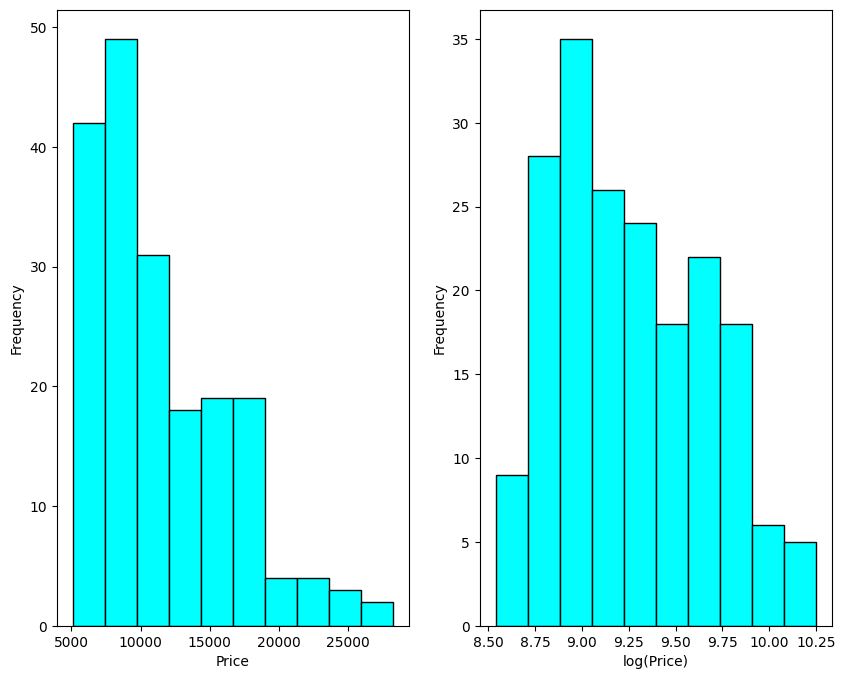

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
ax[0].hist(df['price'],ec='black',color='cyan')
ax[1].hist(log_price,ec='black',color='cyan')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('log(Price)')
ax[1].set_ylabel('Frequency')
plt.show()

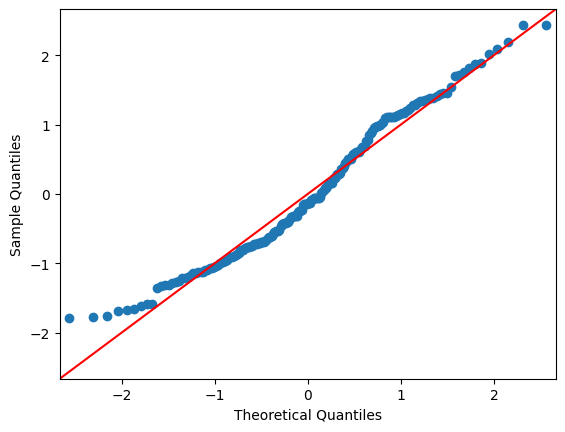

In [ ]:
sm.qqplot((log_price-log_price.mean())/log_price.std(), line ='45')
py.show()

El QQ plot muestra un comportamiento más cercano al normal en el centro y se empieza a desplazar en los extremos

In [ ]:
res = stats.jarque_bera(log_price)
print(res.statistic,res.pvalue)

8.624976466272193 0.013400165342135008


P value es menor a 0.05 así que se rechaza la hipótesis nula de normalidad

# Regresión lineal 1 (Solo variables numéricas)

log(Price) con variables numéricas

- comentar resultados
- antes de comentar, verificar que ya esté bien la limpieza

In [ ]:
numeric_cols.remove("wheel-base")

In [ ]:
numeric_cols.remove("length")
numeric_cols.remove("highway-mpg")

In [ ]:
y = log_price
X = (df[numeric_cols]).drop("price", axis = 1)

**OLS**

In [ ]:
Xc = sm.add_constant(X) #para obtener la ordenada en el origen
model = sm.OLS(y, X) #Ordinary Least Squares
results = model.fit()
print(results.summary())
#results.mse_resid
results.rsquared_adj

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.541e+04
Date:                Wed, 13 Sep 2023   Prob (F-statistic):                   3.72e-284
Time:                        04:14:10   Log-Likelihood:                          30.011
No. Observations:                 191   AIC:                                     -32.02
Df Residuals:                     177   BIC:                                      13.51
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

0.9994634221016518

Comentarios:
P Value de muchas de las variables es mayor a 0.05 lo cual quiere decir que no se rechaza H0 y por lo tanto estas no son significactiva.

Prob(JB) es menor a 0.05 por lo que se rechaza H0 lo cual quiere decir que los residuos no tienen distribución normal.

Este OLS es un mal modelo.

**Sklearn**

In [ ]:
# separamos nuestra data dos partes para entrenar y para hacer el test.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=0)
print('Observaciones para el training:',X_train.shape[0],'Observaciones para el test:',X_test.shape[0])

Observaciones para el training: 133 Observaciones para el test: 58


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)


print('Puntaje entrenamiento: {}\n'.format(model.score(X_train,y_train)))
print('Puntaje Test: {}\n'.format(model.score(X_test,y_test)))
print(model.intercept_, model.coef_)
print('MAE',mean_absolute_error(y_test, predictions)) #mean absolute error
print('MSE',mean_squared_error(y_test, predictions))  #mean squared error


Puntaje entrenamiento: 0.7848735554146498

Puntaje Test: 0.804406675167123

8.81772035169022 [-8.78106153e-03  1.98217525e-03  3.92737562e-02  6.86477704e-03
  6.35183651e-03  2.30758301e-04 -1.91863430e-01  8.07453026e-03
 -2.73734967e-01 -1.67209999e-01  1.43140892e-02  1.84489506e-03
  1.68958894e-05 -1.48087631e-02]
MAE 0.15655313682275054
MSE 0.03494076034591089


In [ ]:
residuos = predictions-y_test
result = stats.jarque_bera(residuos)
print("Jarque-Bera pval=",result.pvalue)

Jarque-Bera pval= 0.3083171242518704


Cometarios:

Esta regresión lineal utilizando sklearn muestra muy buenos resultados de entrenamiento y de prueba. De hecho, al haber obtenido un mejor puntaje con los datos de test, habla bien sobre el aprendizaje de este modelo y su desempeño podría estar ligado a la selección aleatoria de las variables.

Al igual que con el OLS, varios coeficientes tienen valores muy pequeños lo cual quiere decir que estos no son tan significantes en el modelo.

Por último, el valor del p-value en la prueba de Jarque-Bera es mayor a 0.05 así que no se rechaza la hipótesis nula y por tanto la distribución de los residuos no es normal.

Al igual que con la técnica de regresión anterior, es necesario seguir ajustando el modelo y el preprocesamiento de los datos ya que los resultados aún no son óptimos.

# Regresión lineal 2 (Con variables numéricas y categóricas)

In [ ]:
# Se le aplica One Hot Encoding a las variables categóricas

categorical = df.select_dtypes(include='object').columns
one_hot_encoded_data = pd.get_dummies(df[categorical], columns = categorical)
y = np.log(df[numeric_cols]["price"])
numeric_preprocess = df[numeric_cols].iloc[:, :-1]
df_preprocess = pd.concat([numeric_preprocess, one_hot_encoded_data, y], axis=1)

In [ ]:
# Se hace un escalamiento de los datos con MinMaxScaler para que los valores
#permanezcan entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformed = scaler.fit_transform(df_preprocess)
transformed_df = pd.DataFrame(transformed)
transformed_df.columns = df_preprocess.columns
transformed_df

In [ ]:
y = transformed_df["price"]
X = (transformed_df).drop("price", axis = 1)

**OLS**

In [ ]:
Xc = sm.add_constant(X) #para obtener la ordenada en el origen
model = sm.OLS(y, X) #Ordinary Least Squares
results = model.fit()
print(results.summary())
#results.mse_resid
results.rsquared_adj

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     33.22
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           6.57e-57
Time:                        04:23:09   Log-Likelihood:                 256.13
No. Observations:                 191   AIC:                            -404.3
Df Residuals:                     137   BIC:                            -228.6
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
symboling                  0

0.8998748930384635

Comentarios:

- Multicolinealidad: tal y como lo indica el resumen del OLS, podría haber una alto correlación entre las variables que quedan, perjudicando con resultados del modelo.
- Jarque Bera: Prob(JB) es menor a 0.05 por lo que se rechaza H0 lo cual quiere decir que los residuos no tienen distribución normal.
- R^2 y R^2 Adj: 0.98 y 0.90 respectivamente. Estos valores ya no parecen demostrar un overfitting pero permanecen bastante altos.
- Prob (F-statistic):

**Conclusión:**

El mejor modelo es la regresión lineal con sklearn y únicamente con las variables numéricas por los buenos resultados que demostró el puntaje de test. Aún así, sería fundamental seguir desarrollando cada uno de los modelos porque hay características como la multicolinealidad y la distribución de los residuos que aún no cumplen con los supuestos de una regresión lineal. Como siguientes pasos que se sugieren está:

- Realizar la eliminación de variables correlacionadas posterior al escalamiento de los datos.
- Probar con otros modelos de regresión.